# Investigation of California Socioeconomic Relations Dataset

This report covers our analysis of the large census dataset between 2012 and 2016. 

- [Requirements](#library-imports)
- [Introduction](#intro)
- [Processing the Data](#data-processing)
- [Cleaning the Data](#data-cleaning)
- [Exploratory data analysis](#data-analysis)
- [Case Study](#case-study)
- [Data Mapping](#data-mapping)
- [Classification](#classification)
- [Summary](#summary)

## Importing required libraries<a class="anchor" id="library-imports"></a>
Run the following cell to ensure all required libraries are installed before running any of the code below. 

Also, if you don't already have the necessary modules installed, run ```pip install modulename``` to install the module locally on your machine. 

In [1]:
# Standard python packages
import os
import sys
from pathlib import Path

# Other package imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Introduction<a class="anchor" id="intro"></a>

We began the task by looking at the BG_METADATA_2016 csv file as well as the various other csv files and checking out what sort of different areas we were interested to find a correlation between. We have decided to investigate factors affecting educational attainment. 

The possible factors we considered are:
 - Wealth
 - Household structure
 - Sex
 - Race
 
However, when it came to feature engineering, we looked at correlations from all the given CSVs with our response variable

## Obtain and process data<a class="anchor" id="data-processing"></a>

We used pandas and dictionaries available in python to map the long column names for each csv into a more readable table so we could identify the different column names for each table that we could try and find a correlation between: 

In [6]:
data_folder = Path("../data/")
raw_data_folder = data_folder / "raw" / "train"

metadata = pd.read_csv(raw_data_folder / "BG_METADATA_2016.csv")

In [7]:
## Replace the 'short name' of each column of a given data frame with the 'long name' in the metadata file  
def replace_columns(df):
    labels = pd.Series(metadata["Full_Name"].values,index=metadata["Short_Name"]).to_dict()
    df = df.rename(columns=labels)
    return df

Repeat for every CSV

In [8]:
dfs = {}

path = "../data/raw/train/"
for f in os.listdir(path):
    print(f)
    df = pd.read_csv(path+f)
    df = replace_columns(df)
    dfs[f] = df

X02_RACE.csv
X99_IMPUTATION.csv
X00_COUNTS.csv
X20_EARNINGS.csv
X01_AGE_AND_SEX.csv
X03_HISPANIC_OR_LATINO_ORIGIN.csv
X21_VETERAN_STATUS.csv
X17_POVERTY.csv
X12_MARITAL_STATUS_AND_HISTORY.csv
X16_LANGUAGE_SPOKEN_AT_HOME.csv
X22_FOOD_STAMPS.csv
X08_COMMUTING.csv
X09_CHILDREN_HOUSEHOLD_RELATIONSHIP.csv
X27_HEALTH_INSURANCE.csv
X11_HOUSEHOLD_FAMILY_SUBFAMILIES.csv
BG_METADATA_2016.csv
X19_INCOME.csv
X23_EMPLOYMENT_STATUS.csv
X14_SCHOOL_ENROLLMENT.csv
X15_EDUCATIONAL_ATTAINMENT.csv
X07_MIGRATION.csv


We identified our overall response variable (y) as The number of people over the age of 25 that have attained a bachelors degree, This is from the following table:

In [9]:
dfs['X15_EDUCATIONAL_ATTAINMENT.csv']

,Unnamed: 0,GEOID,SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Total: Population 25 years and over -- (Estimate),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Total: Population 25 years and over -- (Margin of Error),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: Population 25 years and over -- (Estimate),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: Population 25 years and over -- (Margin of Error),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: No schooling completed: Population 25 years and over -- (Estimate),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: No schooling completed: Population 25 years and over -- (Margin of Error),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: Nursery to 4th grade: Population 25 years and over -- (Estimate),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: Nursery to 4th grade: Population 25 years and over -- (Margin of Error),...,FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Science and Engineering: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Science and Engineering Related Fields: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Science and Engineering Related Fields: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Business: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Business: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Education: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Education: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error),"FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Arts, Humanities and Other: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate)","FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Arts, Humanities and Other: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error)",OBJECTID
0,0,15000US060014001001,2478,125,1274,109,0,12,9,13,...,24,0,12,0,12,0,12,0,12,3
1,1,15000US060014002001,843,79,427,54,0,12,0,12,...,22,7,11,6,9,0,12,26,22,4
2,2,15000US060014002002,716,82,313,52,0,12,0,12,...,16,0,12,0,12,0,12,13,19,5
3,3,15000US060014003001,973,329,501,189,0,12,0,12,...,21,0,12,0,12,0,12,13,25,6
4,4,15000US060014003002,1117,225,559,151,14,22,0,12,...,57,0,12,0,12,0,12,20,32,7
5,5,15000US060014003003,819,242,359,129,0,12,0,12,...,12,0,12,0,12,0,12,17,29,8
6,6,15000US060014003004,1215,230,434,109,0,12,0,12,...,12,0,12,0,12,0,12,11,23,9
7,7,15000US060014004001,1175,162,457,83,0,12,0,12,...,35,0,12,0,12,0,12,44,49,10
8,8,15000US060014004002,941,149,455,114,22,26,0,12,...,11,12,18,0,12,0,12,20,23,11
9,9,15000US060014004003,1187,197,590,179,0,12,0,12,...,25,8,13,0,12,0,12,0,12,12


## Remove superfluous data

We made sure to check that we removed any duplicated columns, although the pd.read_csv should have done this for us

In [11]:
## Delete duplicate columns
for (_, df) in dfs.items():
    df = df.loc[:, ~df.columns.duplicated()]

## Cleaning the data<a class="anchor" id="data-cleaning"></a>

### Incomplete Data

We then checked the missing data and removed it from the dataset going to use. We do this by looking for NaN values. 

In [19]:
## Prints percentage of rows and columns that contain a NaN value for a given dataframe 
def percent_na(df):
    # Find rows and columns that contain a NaN value
    narows = df[df.isnull().any(axis=1)]
    nacols = df.columns[df.isna().any()].tolist()
    # Calculate the percentage of rows and columns that contain a NaN value
    percent_narows = round(len(narows)/df.shape[0]*100, 1)
    percent_nacols = round(len(nacols)/df.shape[1]*100, 1)
    print("Percent missing data for {} : rows={}% columns={}%".format(name, percent_narows, percent_nacols))
    
## Do this for each CSV file    
for (name, df) in dfs.items():
    percent_na(df)
    

Percent missing data for X23_EMPLOYMENT_STATUS.csv : rows=0.0% columns=0.0%
Percent missing data for X19_INCOME.csv : rows=100.0% columns=26.3%
Percent missing data for X12_MARITAL_STATUS_AND_HISTORY.csv : rows=0.0% columns=0.0%
Percent missing data for X99_IMPUTATION.csv : rows=100.0% columns=2.5%
Percent missing data for X02_RACE.csv : rows=0.0% columns=0.0%
Percent missing data for X17_POVERTY.csv : rows=98.7% columns=3.3%
Percent missing data for X20_EARNINGS.csv : rows=22.5% columns=18.3%
Percent missing data for X22_FOOD_STAMPS.csv : rows=0.0% columns=0.0%
Percent missing data for X09_CHILDREN_HOUSEHOLD_RELATIONSHIP.csv : rows=0.0% columns=0.0%
Percent missing data for X11_HOUSEHOLD_FAMILY_SUBFAMILIES.csv : rows=0.0% columns=0.0%
Percent missing data for X01_AGE_AND_SEX.csv : rows=100.0% columns=36.8%
Percent missing data for X08_COMMUTING.csv : rows=100.0% columns=7.5%
Percent missing data for X27_HEALTH_INSURANCE.csv : rows=0.0% columns=0.0%
Percent missing data for X21_VETERAN

In [101]:
for (name, df) in dfs_no_na.items():
    percent_na(df)

Percent missing data for X12_MARITAL_STATUS_AND_HISTORY.csv : rows=0.0% columns=0.0%
Percent missing data for X01_AGE_AND_SEX.csv : rows=28.4% columns=18.9%
Percent missing data for X07_MIGRATION.csv : rows=0.0% columns=0.0%
Percent missing data for X27_HEALTH_INSURANCE.csv : rows=0.0% columns=0.0%
Percent missing data for X08_COMMUTING.csv : rows=0.0% columns=0.0%
Percent missing data for X19_INCOME.csv : rows=57.0% columns=13.2%
Percent missing data for BG_METADATA_2016.csv : rows=0.0% columns=0.0%
Percent missing data for X22_FOOD_STAMPS.csv : rows=0.0% columns=0.0%
Percent missing data for X03_HISPANIC_OR_LATINO_ORIGIN.csv : rows=0.0% columns=0.0%
Percent missing data for X23_EMPLOYMENT_STATUS.csv : rows=0.0% columns=0.0%
Percent missing data for X15_EDUCATIONAL_ATTAINMENT.csv : rows=0.0% columns=0.0%
Percent missing data for X11_HOUSEHOLD_FAMILY_SUBFAMILIES.csv : rows=0.0% columns=0.0%
Percent missing data for X16_LANGUAGE_SPOKEN_AT_HOME.csv : rows=0.0% columns=0.0%
Percent missin

After cheecking the percentage of missing data in rows and columns for each of the CSVs, we decided to drop the columns that had 20% or greater NaN values.

In [14]:
dfs_no_na = {}
for (name, df) in dfs.items():
    threshold=len(df)*0.8 ## Keep columns with at least 80% data
    dfs_no_na[name] = df.dropna(thresh=threshold, axis=1) 
    print(f"{name} columns dropped : {dfs[name].shape[1] - dfs_no_na[name].shape[1]})
    
del dfs

SyntaxError: EOL while scanning string literal (<ipython-input-14-d2aff1caed44>, line 5)

## Imputation
Single vs. Multiple imputation?

In the interests of time, we use mean. Very fast, but decreases variance of dataset unfortunately.

In [15]:
for (name, df) in dfs_no_na.items():
    dfs_no_na[name] = df.fillna(df.mean())

NameError: name 'dfs_no_na' is not defined

Sanity check to ensure there are no more NaN values in the datasets

for (name, df) in dfs_no_na.items():
    percent_na(df)

In [105]:
for (name, df) in dfs_no_na.items():
    df.to_csv(data_folder / "processed" / name)
    print(f"Saved {name}")

Saved X12_MARITAL_STATUS_AND_HISTORY.csv
Saved X01_AGE_AND_SEX.csv
Saved X07_MIGRATION.csv
Saved X27_HEALTH_INSURANCE.csv
Saved X08_COMMUTING.csv
Saved X19_INCOME.csv
Saved BG_METADATA_2016.csv
Saved X22_FOOD_STAMPS.csv
Saved X03_HISPANIC_OR_LATINO_ORIGIN.csv
Saved X23_EMPLOYMENT_STATUS.csv
Saved X15_EDUCATIONAL_ATTAINMENT.csv
Saved X11_HOUSEHOLD_FAMILY_SUBFAMILIES.csv
Saved X16_LANGUAGE_SPOKEN_AT_HOME.csv
Saved X21_VETERAN_STATUS.csv
Saved X09_CHILDREN_HOUSEHOLD_RELATIONSHIP.csv
Saved X14_SCHOOL_ENROLLMENT.csv
Saved X00_COUNTS.csv
Saved X99_IMPUTATION.csv
Saved X02_RACE.csv
Saved X20_EARNINGS.csv
Saved X17_POVERTY.csv


## Exploratory Data Analysis<a class="anchor" id="data-analysis"></a>

We decided to explore all of the difference CSVs and observe which features has the greatest correlation with our chosen y values

In [3]:
data_folder = Path("../data/processed")

In [20]:
def find_educational_attainment_correlation(characteristic_csv_filepath, edu_attainment_csv_filepath, truncation_index = False, education_standard = 'bachelors'):
    '''
    education_standard = 'bachelors' or 'masters' or 'higher_education'
    '''

    edu_attainment = pd.read_csv(edu_attainment_csv_filepath)
    characteristic = pd.read_csv(characteristic_csv_filepath)

    no_bachelors = edu_attainment["EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Bachelor's degree: Population 25 years and over -- (Estimate)"]
    no_masters = edu_attainment["EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Master's degree: Population 25 years and over -- (Estimate)"]
    no_higher_ed = no_masters + no_bachelors

    edu_population = edu_attainment[edu_attainment.columns[3]]
    char_population = characteristic[characteristic.columns[3]]

    if truncation_index == False:
        truncation_index = len(no_masters)

    fractional_bachelors = no_bachelors/edu_population
    fractional_masters = no_masters/edu_population

    if education_standard == 'bachelors':
        y = no_bachelors[0:truncation_index]
    if education_standard == 'masters':
        y = no_masters[0:truncation_index]
    else:
        y = no_higher_ed[0:truncation_index]

    correlations = []
    column_name = []


    for column in characteristic.columns[4:]:
        absolute_x = characteristic[column][0:truncation_index]
        fractional_x = absolute_x/char_population[0:truncation_index]
        correlations.append(np.corrcoef(absolute_x, y)[0][1])
        column_name.append(characteristic[column].name)

    df = pd.DataFrame(correlations, column_name, columns = ['correlation'])
    '''
    returns max correlating factor, all correlations,
    '''

    return df.sort_values('correlation', ascending = False)

In [21]:
poverty_file = data_folder / "X17_POVERTY.csv"
education_file = data_folder / "X15_EDUCATIONAL_ATTAINMENT.csv"
correlations_df = find_educational_attainment_correlation(str(poverty_file), str(education_file), truncation_index = False, education_standard = 'higher_education')

FileNotFoundError: File b'../data/X15_EDUCATIONAL_ATTAINMENT.csv' does not exist

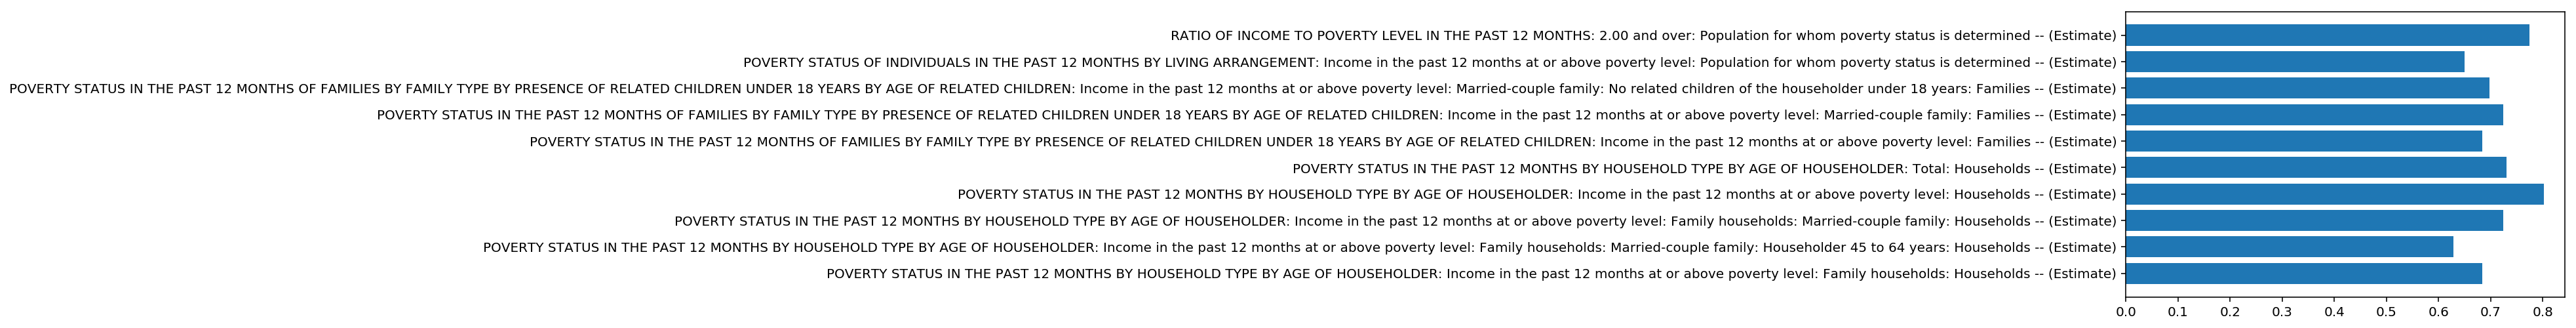

In [61]:
#print(correlations_df.index[:10])
plt.barh(correlations_df.index[:10], correlations_df["correlation"].values[:10])
#plt.xticks(rotation='vertical')
plt.show()

## Case Study: How gross income per capita affects educational attainment<a class="anchor" id="case-study"></a>

## Mapping the Data<a class="anchor" id="data-mapping"></a>

## Classification<a class="anchor" id="classification"></a>

## Summary<a class="anchor" id="summary"></a>